# Credit Card Approval Prediction

DATASET: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

CONTEXT: Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data
df_record = pd.read_csv('data/application_record.csv/application_record.csv')
df_score = pd.read_csv('data/credit_record.csv/credit_record.csv')

In [2]:
# profile the data
import pandas as pd
from pandasgui import show

## Profiling

In [4]:
from ydata_profiling import ProfileReport


record_report = ProfileReport(df_record, title="Record")
score_report = ProfileReport(df_score, title="Score")


# comparison_report = record_report.compare(score_report)
# comparison_report.to_file("comparison.html")

c:\Users\User\miniconda3\envs\my-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
record_report.to_file("record_report.html")

Summarize dataset:  80%|████████  | 20/25 [00:05<00:01,  2.94it/s, Calculate auto correlation]           c:\Users\User\miniconda3\envs\my-env\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'M'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


In [9]:
score_report.to_file("score_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 18.57it/s]



## Evaulation of datasets using exploratory data analysis methods

In [3]:
df_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [12]:
df_score.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [14]:
df_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [13]:
df_score.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [15]:
df_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [14]:
df_score.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

# Features

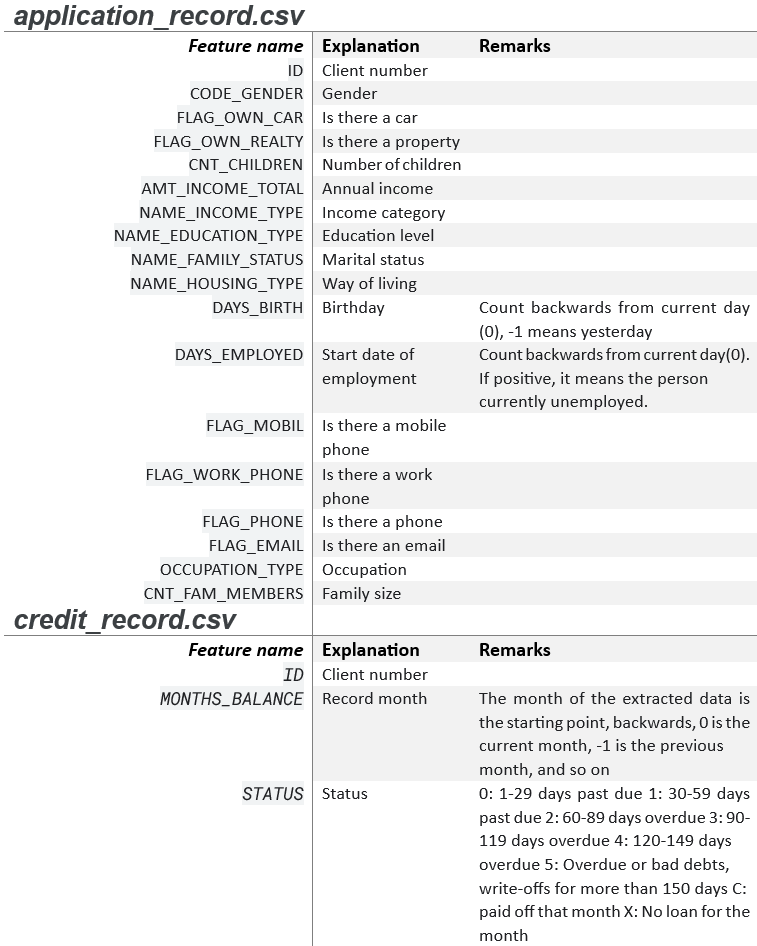

#### Detect inconsistencies or missing values

In [15]:
# missing values
print(df_record.isnull().sum())

# how much percent of the data is missing
print(df_record.isnull().mean()*100)
# about 30% of the data is missing


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64
ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE   

In [16]:
# missing values
print(df_score.isnull().sum())

# how much percent of the data is missing
print(df_score.isnull().mean()*100)
# no data missing

# status: 
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, 
# write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64
ID                0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64


### Summarize characteristics

In [3]:
# check for duplicates
print(df_record.duplicated().sum())

# characteristics of the data
print(df_record.nunique())
print(df_score.nunique())
# --> ID is unique to each record


0
ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64
ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [11]:
# types of data
print(df_record.dtypes)

# --> 14 categorical columns 
# --> 3 numerical columns
# --> 1 ID column


ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


### the ID column are unique in both

In [4]:

# Merge 'record' and 'score' dataframes on 'ID' 
merged_df = pd.merge(df_record, df_score, on='ID', how='inner')

merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


Convert categorical values to numeric:

In [5]:
# convert categorical columns to numerical columns
merged_df["CODE_GENDER"] = merged_df["CODE_GENDER"].replace({"M": 0, "F": 1})
merged_df["FLAG_OWN_CAR"] = merged_df["FLAG_OWN_CAR"].replace({"N": 0, "Y": 1})
merged_df["FLAG_OWN_REALTY"] = merged_df["FLAG_OWN_REALTY"].replace({"N": 0, "Y": 1})
#merged_df["NAME_INCOME_TYPE"] = merged_df["NAME_INCOME_TYPE"].replace({"Pensioner": 0, "State servant": 1, "Commercial associate": 2, "Working": 3, "Student": 4, "Businessman": 5, "Unemployed": 6, "Maternity leave": 7})


C:\Users\User\AppData\Local\Temp\ipykernel_22056\2253044869.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df["CODE_GENDER"] = merged_df["CODE_GENDER"].replace({"M": 0, "F": 1})
C:\Users\User\AppData\Local\Temp\ipykernel_22056\2253044869.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df["FLAG_OWN_CAR"] = merged_df["FLAG_OWN_CAR"].replace({"N": 0, "Y": 1})
C:\Users\User\AppData\Local\Temp\ipykernel_22056\2253044869.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

### Distribution of important columns

AMT_INCOME_TOTAL

c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Income')

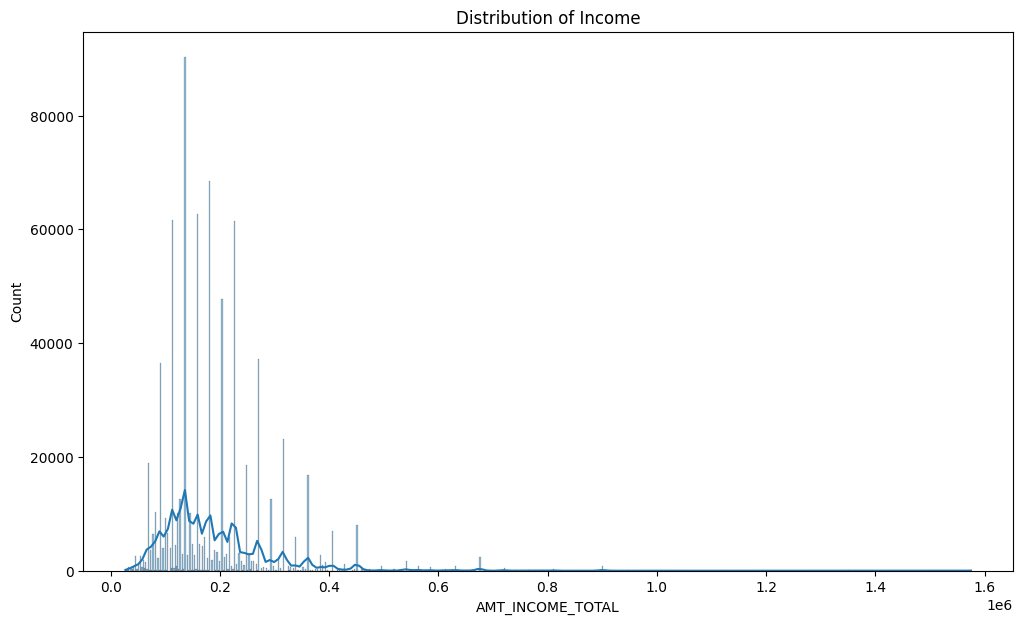

In [5]:
# distribution of the income
plt.figure(figsize=(12, 7))
sns.histplot(merged_df['AMT_INCOME_TOTAL'], kde=True)
plt.title('Distribution of Income')



DAYS_EMPLOYED= start date of employment, Count backwards from current day(0). If positive, it means the person currently unemployed.

In [11]:
merged_df["DAYS_EMPLOYED"].describe()

count    777715.000000
mean      57775.825016
std      136471.735391
min      -15713.000000
25%       -3292.000000
50%       -1682.000000
75%        -431.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [12]:
positive_employed = merged_df[merged_df["DAYS_EMPLOYED"] > 0]
positive_employed["DAYS_EMPLOYED"].describe()

count    127972.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

The minimum value (-15713) is about 43 years.
The maximum value (365243) is about 1000 years -> not relevant data.
The positive value means currently unemployed -> all positive value are the same. 
- convert all positive value to 0

In [34]:
merged_df["DAYS_EMPLOYED"]=merged_df["DAYS_EMPLOYED"].apply(lambda x: 0 if x > 0 else x)

c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Days Employed')

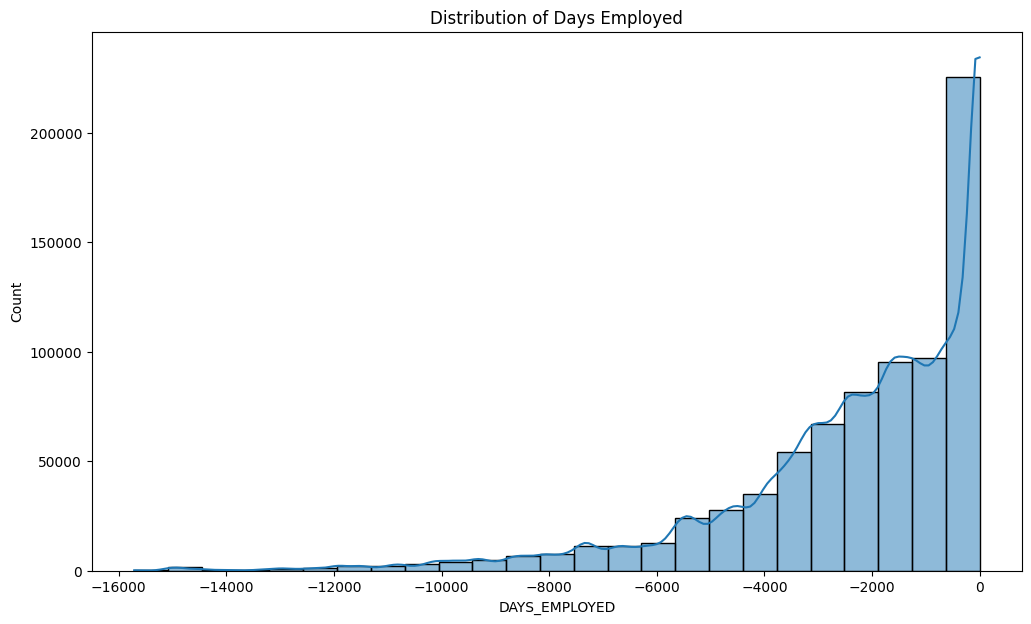

In [30]:
# distribution of the days employed
plt.figure(figsize=(12, 7))
sns.histplot(merged_df['DAYS_EMPLOYED'], kde=True,bins=25)
plt.title('Distribution of Days Employed')


DAYS_BIRTH

In [35]:
merged_df["DAYS_BIRTH_YEAR"] = merged_df["DAYS_BIRTH"].apply(lambda x: (x/-365))

In [34]:
merged_df["DAYS_BIRTH_YEAR"].describe()

count    777715.000000
mean         44.177910
std          11.244669
min          20.517808
25%          34.838356
50%          43.178082
75%          53.295890
max          68.909589
Name: DAYS_BIRTH_YEAR, dtype: float64

c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Birth Date')

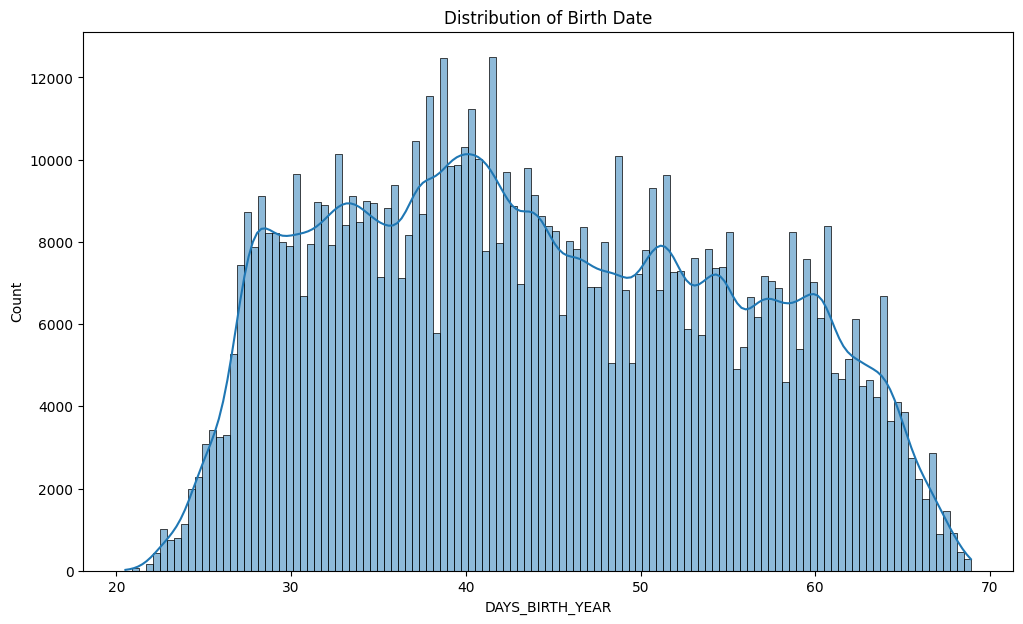

In [35]:
# distribution of the registration date
plt.figure(figsize=(12, 7))
sns.histplot(merged_df['DAYS_BIRTH_YEAR'], kde=True)
plt.title('Distribution of Birth Date')



Data cover all adult age groups

MONTHS_BALANCE = The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

In [37]:
merged_df["MONTHS_BALANCE"].describe()

count    777715.000000
mean        -19.373564
std          14.082208
min         -60.000000
25%         -29.000000
50%         -17.000000
75%          -8.000000
max           0.000000
Name: MONTHS_BALANCE, dtype: float64

The time period related to the credit process.

c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Months Balance')

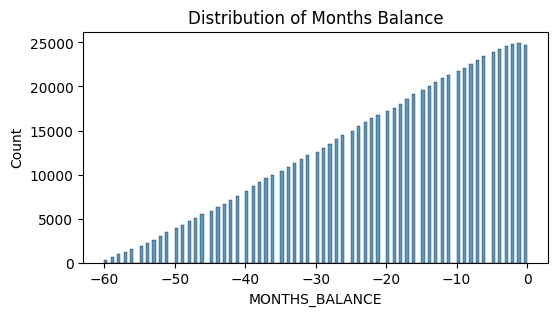

In [13]:
# distribution of months balance
plt.figure(figsize=(6, 3))
sns.histplot(merged_df['MONTHS_BALANCE'])
plt.title('Distribution of Months Balance')


FLAG_MOBILE

In [14]:
merged_df["FLAG_MOBIL"].value_counts()

FLAG_MOBIL
1    777715
Name: count, dtype: int64

In [36]:
#DROP FLAG_MOBIL
merged_df = merged_df.drop(columns=["FLAG_MOBIL"])

CNT_CHILDREN

In [40]:
merged_df["CNT_CHILDREN"].describe()

count    777715.000000
mean          0.428082
std           0.745755
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [61]:
# extreme values
merged_df["CNT_CHILDREN"].value_counts()

# visualize value counts with percentage
merged_df["CNT_CHILDREN"].value_counts(normalize=True)

CNT_CHILDREN
0     0.695163
1     0.200122
2     0.090520
3     0.011994
4     0.001574
5     0.000417
14    0.000143
7     0.000059
19    0.000008
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Children Count Pie Chart')

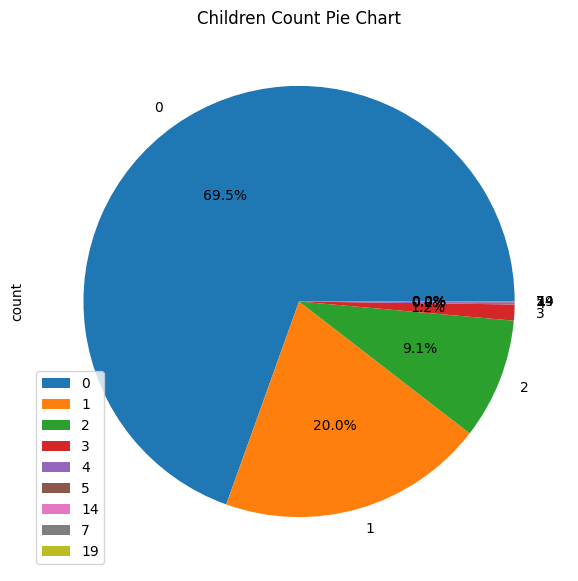

In [66]:
# visualise percentage of children count values
plt.figure(figsize=(12, 7))
merged_df["CNT_CHILDREN"].value_counts().plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Children Count Pie Chart')


A very large proportion of the data include childless individuals. 

CNT_FAM_MEMBERS=Count of family members

Text(0.5, 1.0, 'Fam members Count Pie Chart')

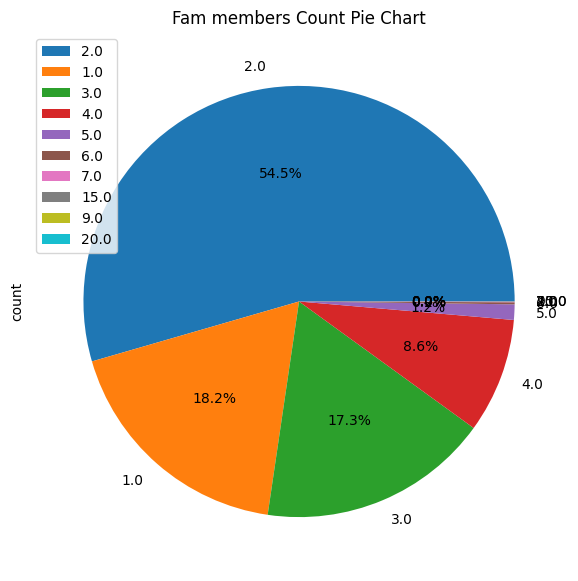

In [67]:
# visualise percentage of family members count values
plt.figure(figsize=(12, 7))
merged_df["CNT_FAM_MEMBERS"].value_counts().plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Fam members Count Pie Chart')

NAME_HOUSING_TYPE

Text(0.5, 1.0, 'Housing Type Pie Chart')

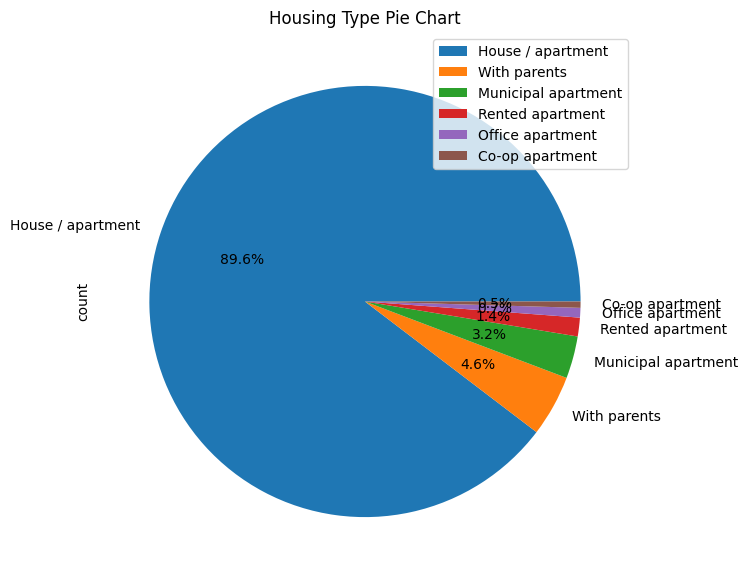

In [86]:
# visualise percentage of HOUSE_TYPE 
plt.figure(figsize=(12, 7))
merged_df["NAME_HOUSING_TYPE"].value_counts().plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Housing Type Pie Chart')

unequal distribution by housing

OCCUPATION_TYPE

c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Security staff'),
  Text(1, 0, 'Sales staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Laborers'),
  Text(4, 0, 'Managers'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'Core staff'),
  Text(7, 0, 'High skill tech staff'),
  Text(8, 0, 'Cleaning staff'),
  Text(9, 0, 'Private service staff'),
  Text(10, 0, 'Cooking staff'),
  Text(11, 0, 'Low-skill Laborers'),
  Text(12, 0, 'Medicine staff'),
  Text(13, 0, 'Secretaries'),
  Text(14, 0, 'Waiters/barmen staff'),
  Text(15, 0, 'HR staff'),
  Text(16, 0, 'Realty agents'),
  Text(17, 0, 'IT staff')])

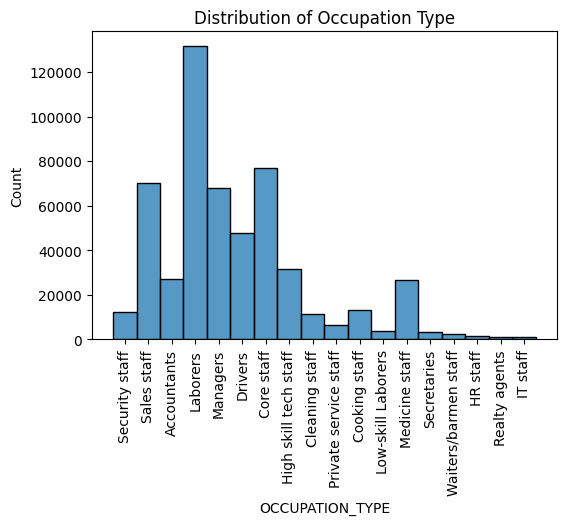

In [84]:
# distribution of the occupation type
plt.figure(figsize=(6, 4))
sns.histplot(merged_df['OCCUPATION_TYPE'])
plt.title('Distribution of Occupation Type')
plt.xticks(rotation=90)


In [37]:
merged_df["STATUS"].value_counts()

STATUS
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

In [38]:

# based on distribution -> merge the status values to C, X, 0, L(ate more than 30 days)
merged_df["STATUS"] = merged_df["STATUS"].replace({ "1": "L", "2": "L", "3": "L", "4": "L", "5": "L"})

Text(0.5, 1.0, 'STATUS Pie Chart')

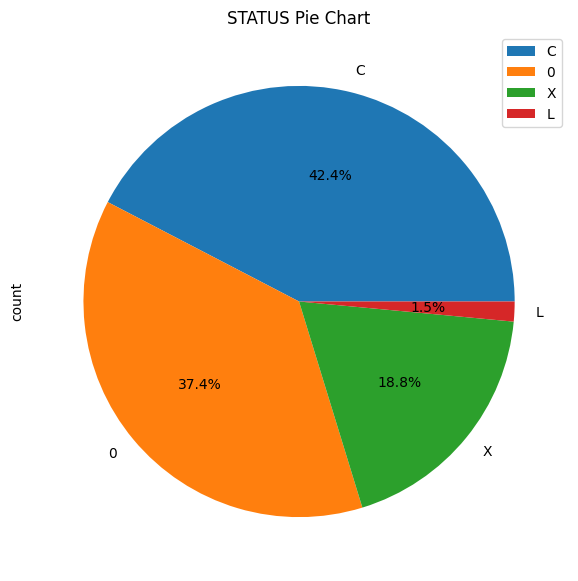

In [39]:
# visualise STATUS values
plt.figure(figsize=(12, 7))
merged_df["STATUS"].value_counts().plot.pie(legend=True, autopct='%1.1f%%')
plt.title('STATUS Pie Chart')

c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\User\miniconda3\envs\my-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

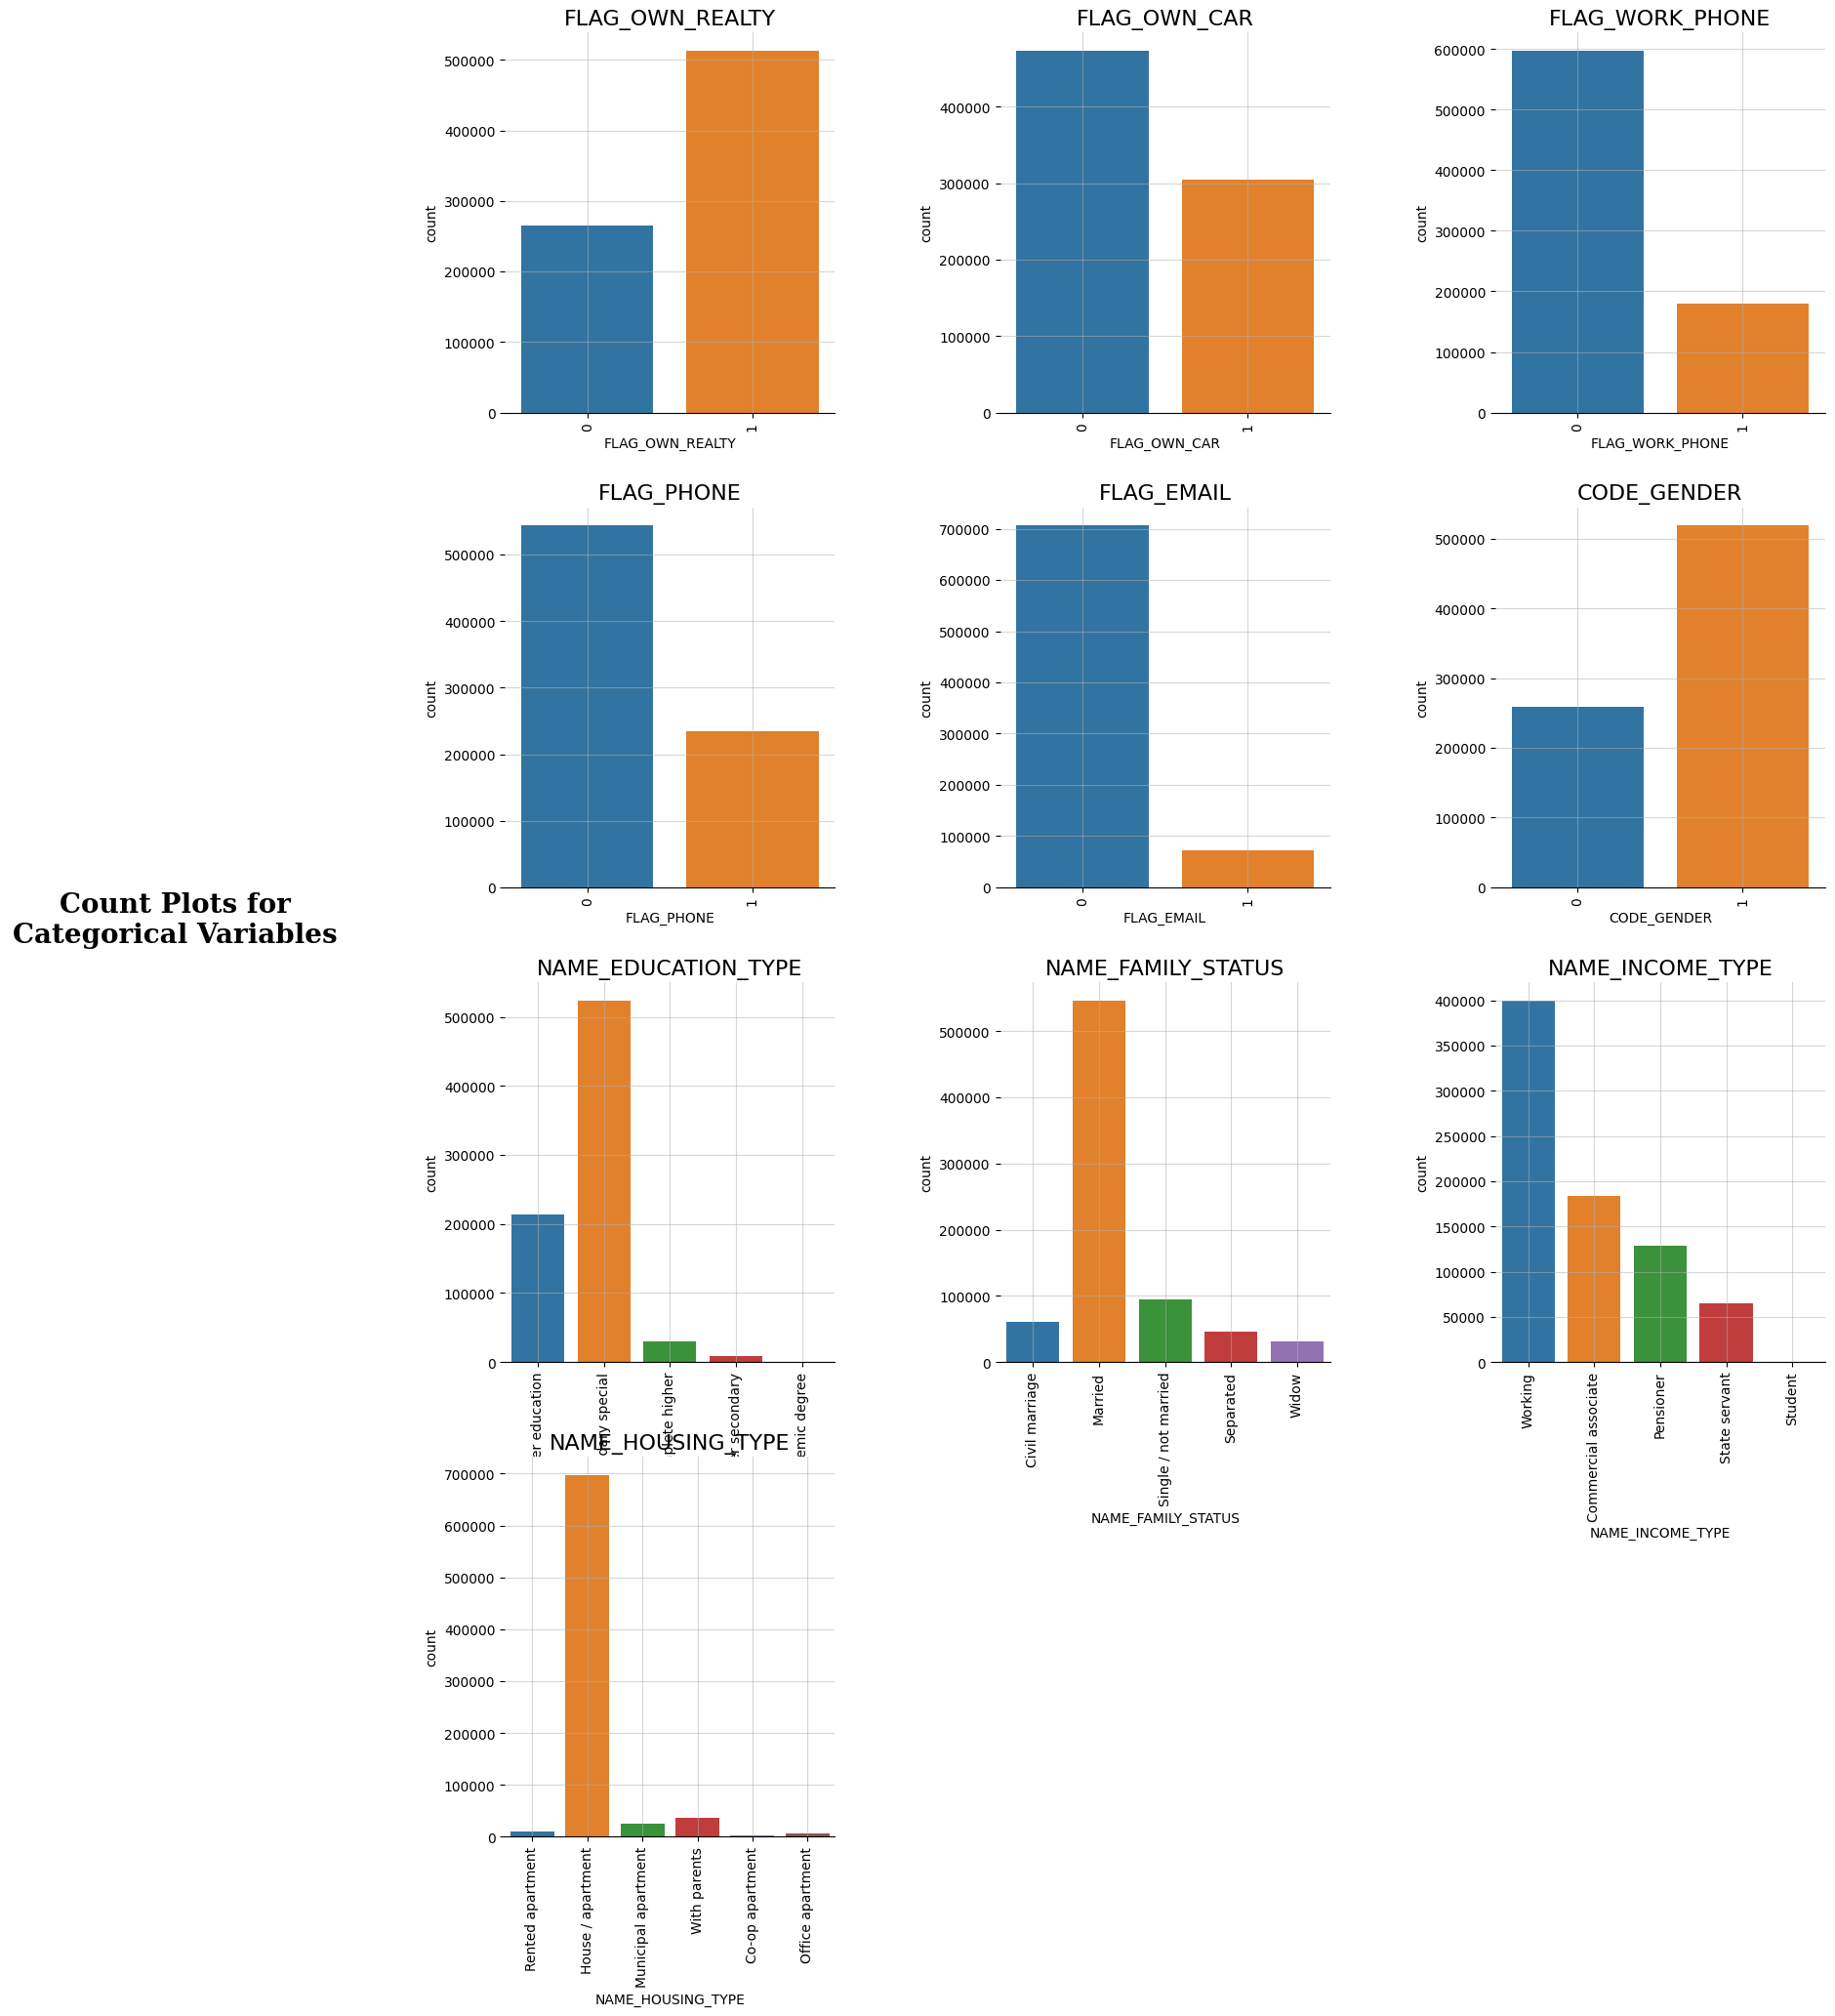

In [89]:
columns = ["FLAG_OWN_REALTY","FLAG_OWN_CAR","FLAG_WORK_PHONE","FLAG_PHONE",
           "FLAG_EMAIL","CODE_GENDER","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
           "NAME_INCOME_TYPE","NAME_HOUSING_TYPE"]

fig = plt.figure(figsize=(24, 24)) 


gs = fig.add_gridspec(4, 4)
gs.update(wspace=0.5, hspace=0.25)

ax_title = fig.add_subplot(gs[:, 0])
ax_title.text(0.5, 0.5, "Count Plots for\nCategorical Variables\n", 
              horizontalalignment='center', verticalalignment='center', 
              fontsize=20, fontweight='bold', fontfamily='serif', color="#000000")
ax_title.set_xticks([])
ax_title.set_yticks([])

ax_title.grid(False)
for spine in ax_title.spines.values():
    spine.set_visible(False)


for i, col in enumerate(columns):
    ax = fig.add_subplot(gs[i // 3, (i % 3) + 1]) 
    sns.countplot(x=col, data=merged_df, ax=ax,)
    ax.set_title(col, fontsize=16)
    plt.xticks(rotation=90)
    ax.grid(alpha=0.5)
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom':
            spine.set_visible(False)

plt.tight_layout()
plt.show()

There are more females in the dataset
The number of clients who don't have car is more than the number of clients who have car

In [72]:
# save the merged data
merged_df.to_csv("merged_data.csv", index=False)